In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


path = '/home/harold/Downloads/Color gamut calculation.csv'
data = np.genfromtxt(path, delimiter=',')
data

array([[3.50e+02, 4.23e-05],
       [3.51e+02, 3.85e-05],
       [3.52e+02, 4.40e-05],
       [3.53e+02, 4.48e-05],
       [3.54e+02, 4.47e-05],
       [3.55e+02, 3.91e-05],
       [3.56e+02, 4.17e-05],
       [3.57e+02, 4.23e-05],
       [3.58e+02, 4.00e-05],
       [3.59e+02, 4.67e-05],
       [3.60e+02, 4.30e-05],
       [3.61e+02, 4.65e-05],
       [3.62e+02, 4.46e-05],
       [3.63e+02, 4.41e-05],
       [3.64e+02, 4.17e-05],
       [3.65e+02, 4.47e-05],
       [3.66e+02, 4.16e-05],
       [3.67e+02, 4.73e-05],
       [3.68e+02, 4.02e-05],
       [3.69e+02, 4.17e-05],
       [3.70e+02, 3.36e-05],
       [3.71e+02, 3.59e-05],
       [3.72e+02, 3.46e-05],
       [3.73e+02, 2.88e-05],
       [3.74e+02, 2.82e-05],
       [3.75e+02, 2.55e-05],
       [3.76e+02, 1.95e-05],
       [3.77e+02, 1.55e-05],
       [3.78e+02, 1.47e-05],
       [3.79e+02, 1.23e-05],
       [3.80e+02, 1.09e-05],
       [3.81e+02, 1.13e-05],
       [3.82e+02, 1.05e-05],
       [3.83e+02, 9.89e-06],
       [3.84e+

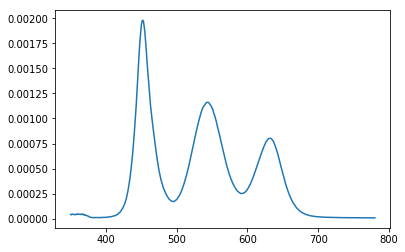

In [2]:
x = data[:,0]
y = data[:,1]

plt.plot(x, y)

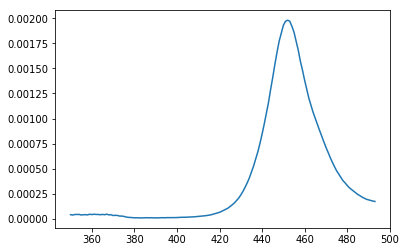

In [3]:
# divide whole spectrum into B, G, R three parts
Bx = data[:144, 0]
By = data[:144, 1]
plt.plot(Bx, By)

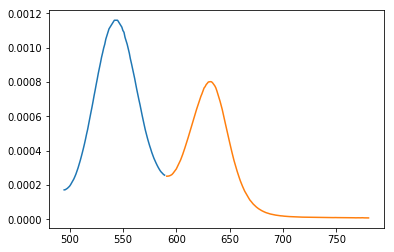

In [4]:
Gx = data[145:240, 0]
Gy = data[145:240, 1]

Rx = data[241:, 0]
Ry = data[241:, 1]

plt.plot(Gx, Gy, Rx, Ry)

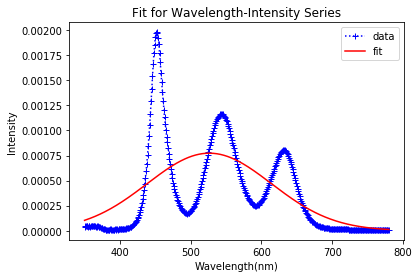

In [5]:
# weighted arithmetic mean (corrected - check the section below)
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])

plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Fit for Wavelength-Intensity Series')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Intensity')
plt.show()

In [6]:
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))


def Fitting(x, y, f):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

    popt,pcov = curve_fit(f, x, y, p0=[max(y), mean, sigma])
    
    residuals = y - f(x, *popt)
    ss_res = np.sum(residuals**2)
    
    ss_tot = np.sum((y - np.mean(y))**2)
    
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(x, y, 'b+:', label='data')
    plt.plot(x, f(x, *popt), 'r-', label='fit')
    plt.legend()
    plt.title('Fit for Wavelength-Intensity Series')
    plt.xlabel('Wavelength(nm)')
    plt.ylabel('Intensity')
    plt.show()
    print("Peak value in original data is at ({}, {})".format(x[y.argmax(axis=0)], y[y.argmax(axis=0)]))
    print("Peak value in fitting curve is at ({}, {})".\
          format(x[f(x, *popt).argmax(axis=0)], round(f(x, *popt)[f(x, *popt).argmax(axis=0)], 5)))
    print("R2-value is {}".format(r_squared))
    print("Peak_amplitude is {}".format(round(popt[0], 5)))
    print("Peak_center is {}".format(round(popt[1], 5)))
    print("Peak_sigma is {}".format(round(popt[2], 5)))

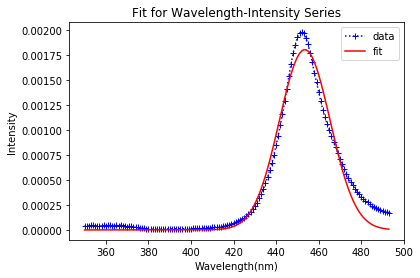

Peak value in original data is at (452.0, 0.00198)
Peak value in fitting curve is at (453.0, 0.0018)
R2-value is 0.9738513300636482
Peak_amplitude is 0.00181
Peak_center is 453.46934
Peak_sigma is 11.91743


In [7]:
Fitting(Bx, By, Gauss)

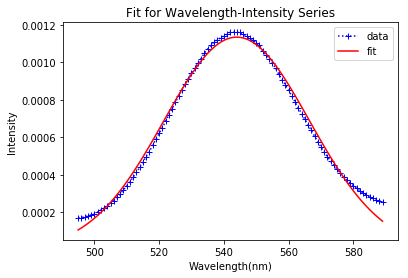

Peak value in original data is at (542.0, 0.00116)
Peak value in fitting curve is at (544.0, 0.00113)
R2-value is 0.9908247851689925
Peak_amplitude is 0.00113
Peak_center is 543.95573
Peak_sigma is 22.49419


In [8]:
Fitting(Gx, Gy, Gauss)

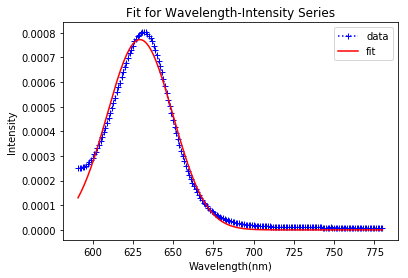

Peak value in original data is at (632.0, 0.000802)
Peak value in fitting curve is at (629.0, 0.00077)
R2-value is 0.9904498705194232
Peak_amplitude is 0.00077
Peak_center is 629.45422
Peak_sigma is 20.39023


In [9]:
Fitting(Rx, Ry, Gauss)

In [10]:
# LMFIT module for Skewed Gaussian Fitting
from lmfit.models import SkewedGaussianModel, ConstantModel


def SGM_Fitting(x, y):
    # model = SkewedGaussianModel(prefix='peak_') + ConstantModel()
    model = SkewedGaussianModel(prefix='peak_')
    
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
    
    # set initial parameter values
    params = model.make_params(c=1.0, peak_center=x[y.argmax(axis=0)],
                              peak_sigma=sigma, peak_amplitude=max(y))
    
    # it's not really needed for this data, but you can put bounds on 
    # parameters like this (or set .vary=False to fix a parameter)
    params['peak_sigma'].min = 0 # sigma > 0
    params['peak_amplitude'].min = 0 # amplitude > 0
    params['peak_center'].min = x[y.argmax(axis=0)] - 10
    params['peak_center'].max = x[y.argmax(axis=0)] + 10
    
    # adjust parameters to best fit data
    result = model.fit(y, params, x=x)
    
    print(result.fit_report())
    print('***********************************************************')
    print(result.ci_report())
    print('***********************************************************')
    
    residuals = result.residual
    ss_res = np.sum(residuals**2)
    
    ss_tot = np.sum((y - np.mean(y))**2)
    
    r_squared = 1 - (ss_res / ss_tot)
    print("R2-value is {}".format(r_squared))
    
    plt.plot(x, y, 'b+:', label='data')
    plt.plot(x, result.best_fit, 'r-', label='fit')
    plt.legend()
    plt.title('Fit for Wavelength-Intensity Series')
    plt.xlabel('Wavelength(nm)')
    plt.ylabel('Intensity')
    
    dely = result.eval_uncertainty(x=x)
    plt.fill_between(x, result.best_fit - dely, result.best_fit + dely, color="#ABABAB")
    
    plt.show()

[[Model]]
    Model(skewed_gaussian, prefix='peak_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1717
    # data points      = 144
    # variables        = 4
    chi-square         = 6.0944e-07
    reduced chi-square = 4.3532e-09
    Akaike info crit   = -2768.39729
    Bayesian info crit = -2756.51804
[[Variables]]
    peak_gamma:      2.21662923 +/- 0.14167325 (6.39%) (init = 0)
    peak_sigma:      18.2340258 +/- 0.38132499 (2.09%) (init = 19.26784)
    peak_center:     442.235099 +/- 0.27596016 (0.06%) (init = 452)
    peak_amplitude:  0.05467469 +/- 5.3774e-04 (0.98%) (init = 0.00198)
    peak_height:     0.00119623 +/- 2.3075e-05 (1.93%) == '0.3989423*peak_amplitude/max(1.e-15, peak_sigma)'
    peak_fwhm:       42.9378487 +/- 0.89795172 (2.09%) == '2.3548200*peak_sigma'
[[Correlations]] (unreported correlations are < 0.100)
    C(peak_sigma, peak_center)     = -0.865
    C(peak_gamma, peak_sigma)      =  0.834
    C(peak_gamma, peak_center)     = 

/home/harold/anaconda3/envs/test/lib/python3.6/site-packages/lmfit/confidence.py:303: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 2 and prob(peak_center=441.6831788939296) = 0.6623639025807984 < max(sigmas).
  warn(errmsg)


                   99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 peak_gamma    :  -0.38939  -0.25905  -0.13002   2.21663  +0.13270  +0.26183  +0.38058
 peak_sigma    :  -1.16737  -0.76504  -0.37820  18.23403  +0.37452  +0.66678  +0.90512
 peak_center   :      -inf      -inf      -inf 442.23510  +0.25666  +0.52942  +0.82788
 peak_amplitude:  -0.00170  -0.00112  -0.00056   0.05467  +0.00056  +0.00113  +0.00172
***********************************************************
R2-value is 0.9868970642712146


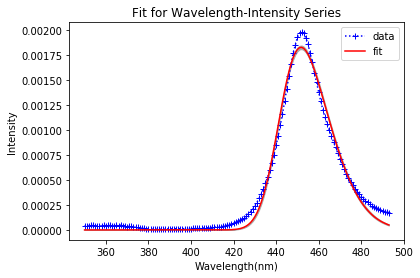

In [11]:
SGM_Fitting(Bx, By)

In [12]:
from lmfit.models import GaussianModel


def GM_Fitting(x, y):
    model = GaussianModel(prefix='peak_')
    
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
    
    params = model.make_params(peak_center=x[y.argmax(axis=0)],
                              peak_sigma=sigma, peak_amplitude=max(y))
    
    # it's not really needed for this data, but you can put bounds on 
    # parameters like this (or set .vary=False to fix a parameter)
    params['peak_sigma'].min = 0 # sigma > 0
    params['peak_amplitude'].min = 0 # amplitude > 0
    params['peak_center'].min = x[y.argmax(axis=0)] - 10
    params['peak_center'].max = x[y.argmax(axis=0)] + 10
    
    # adjust parameters to best fit data
    result = model.fit(y, params, x=x)
    
    print(result.fit_report())
    print('***********************************************************')
    print(result.ci_report())
    plt.plot(x, y, 'b+:', label='data')
    plt.plot(x, result.best_fit, 'r-', label='fit')
    plt.legend()
    plt.title('Fit for Wavelength-Intensity Series')
    plt.xlabel('Wavelength(nm)')
    plt.ylabel('Intensity')
    
    dely = result.eval_uncertainty(x=x)
    plt.fill_between(x, result.best_fit - dely, result.best_fit + dely, color="#ABABAB")
    
    plt.show()

[[Model]]
    Model(gaussian, prefix='peak_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2251
    # data points      = 144
    # variables        = 3
    chi-square         = 1.2162e-06
    reduced chi-square = 8.6257e-09
    Akaike info crit   = -2670.89876
    Bayesian info crit = -2661.98932
[[Variables]]
    peak_sigma:      11.9174708 +/- 0.18859571 (1.58%) (init = 19.26784)
    peak_center:     453.469364 +/- 0.18857206 (0.04%) (init = 452)
    peak_amplitude:  0.05395469 +/- 7.3937e-04 (1.37%) (init = 0.00198)
    peak_fwhm:       28.0634987 +/- 0.44410894 (1.58%) == '2.3548200*peak_sigma'
    peak_height:     0.00180616 +/- 2.4751e-05 (1.37%) == '0.3989423*peak_amplitude/max(1.e-15, peak_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(peak_sigma, peak_amplitude) =  0.577

***********************************************************
                   99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 peak_si

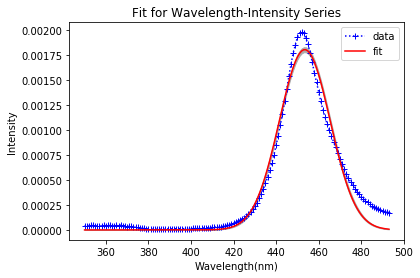

In [13]:
GM_Fitting(Bx, By)